## Instructions For running the codes - 

1) Please run the codes in sequence as given as the functions are dependent on each other and also there might be the page that is opened already is used.

2) If the code gives some exceptions then please re-run it might be due data transmission although i have included sleep commands to get the elements loaded completely.

3) I have printed some variables that are not asked to be printed that is just for sake of clarity of what's happening.

4) In The 2nd , i have writen in very much detail about working of code,so please refer to that cause i have done 3 parts of question using same function .

5) If a code doesn't run or give errors, please re-run it , it will surely work i have checked all the codes twice.

6) In last question the average likes of the handle has been calculated by the function and used it directly to find the ratio.

### LOGGING IN INSTAGRAM

In [146]:
# importing all the required libraries
# Creating a web driver session

import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
import pandas as pd
import re 

# importing for exceptions
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
driver = webdriver.Chrome(executable_path = 'chromedriver')# Please set the path here accordingly.

In [147]:
# Function to login in Instagram and if the pop-up comes then it is also handled.

def login() :
    driver.get('https://www.instagram.com/') # visiting instagram
    time.sleep(3)
    user_name_text_box = driver.find_element_by_name('username') # finding text box for username
    user_name_text_box.send_keys('USER NAME') # replace here with your username
    pass_text_box = driver.find_element_by_name('password') # finding text box for password
    pass_text_box.send_keys('PASSWORD') # provide here your password
    driver.find_element_by_class_name('L3NKy').click()
    time.sleep(3) 
    
    # here, if the popup saying 'turn on notifications' is popped then it is handled
    
    try :
        popup = driver.find_element_by_class_name('HoLwm')
        if popup.is_enabled :
            popup.click()
            
    except NoSuchElementException:
        pass

In [148]:
login()

## 1) Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

### 1.1) From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [4]:
# Fuction for seaching for text box and seaching for the specific kwyword
# This Function will be used in further Questions also

def text_box(search_this):
    text_box = driver.find_element_by_class_name('x3qfX') # finding text box using its class
    text_box.clear() # clearing it so that if some other thing is written in it then it is removed first
    text_box.send_keys(search_this) # searching for the keyword given

In [5]:
# This Function searches for all the insta Handles displayed after typing 'food' and displays list of those handles
# Locations and tags that comes on searching are handled i.e. are not displayed here.
# Only instagram handles will be displayed.

def food_insta_handles() :
    text_box('food') # calling text_box function so that food is searched in search
    time.sleep(4)
    lst = driver.find_elements_by_class_name('yCE8d') # made list of all the elements in list
    insta_handles = []

    # done this so that only handles are displayed not tags and locations 
    
    for i in lst:
        if ('locations' not in i.get_attribute('href'))  and ('tags' not in i.get_attribute('href')) :
            insta_handles.append(i)
    
    Food_handles = []
    
    for j in range(10) :
        Food_handles.append(insta_handles[j].find_element_by_xpath('div/div[2]/div/span').text) 
         
    return Food_handles

In [6]:
# calling finction
# These are the first 10 followers 

handles = food_insta_handles()
handles

['foodgod',
 'foodnetwork',
 'food52',
 'foodmybff',
 'foodinsider',
 'buzzfeedfood',
 'food',
 'foodandwine',
 'foodsile',
 'dreamfood']

In [7]:
# function for opening the profile given.
# This function will be used extensively in further questions.

def open_profile(profile_name) :
    text_box(profile_name) # calling text_box function to search for given keyword
    time.sleep(3)
    driver.find_element_by_class_name('yCE8d').click()

In [8]:
# QUES 1.1) 
"""""
In this question , we first vesit each handle of the 10 handles, and store the followers in a list,
then sorted the dictionary according to the followers and extracted top 5 most popular handles.

"""""
def top_5_handles() :
    Food_handles = food_insta_handles() # getting first 10 food handles
    time.sleep(2)
    d = {}
    for i in Food_handles :
        driver.get('https://www.instagram.com/' + str(i)) # visiting each handle
        time.sleep(3)
        followers = driver.find_elements_by_class_name('g47SY')[1].get_attribute('title') # extracting followers of each handle
        d[i] = int(followers.replace(',','')) # converting to integer value
    
    sorted_dict = sorted(d.items(), key = lambda kv:kv[1], reverse = True)[:5] # sorting the by number of followers 
    return sorted_dict # returned dictionary

In [9]:
# calling function to obtain 5 most popular handles

top_handles = top_5_handles()

# printing those handles

for i in top_handles :
    print(i[0])

foodnetwork
buzzfeedfood
foodgod
foodandwine
food52


### 1.2) Now Find the number of posts these handles have done in the previous 3 days.

In [16]:
"""""
This Functions visits each of the above 5 handles and then visits the posts , extracts the time of uploading the post,
We have 3 cases that could be text where we have the time written -

1) In terms of minutes.
2) In terms of Hours.
3) In terms of Hour.

We increase the count of posts by 1 if any of above condn is met and if not then if it is written in form of days 
then if it will be < 3 then we increase count by 1 otherwise break the loop

"""""

def Post_count(insta_handles) :
    d = {} 
    for i in insta_handles :
        driver.get('https://www.instagram.com/' + str(i[0])) # visiting the most popular 5 handles
        time.sleep(3)
        posts = driver.find_elements_by_class_name('v1Nh3') # finding all posts on page
        count = 0
        posts[0].click() # clicking on first post
        while True : 
            try :
                time.sleep(3)
                upload_time = driver.find_element_by_class_name('_1o9PC').text.split(" ") # extracting text of time
                if (upload_time[1] == 'HOURS' or upload_time[1] == 'HOUR' or upload_time[1] == 'MINUTES') : # checking condns
                    count += 1
                elif (int(upload_time[0]) < 3) : # if > 3 days then break
                    count += 1
                else :
                    break
                next_button = driver.find_element_by_class_name('_65Bje') # clicking on next button to go to next post
                next_button.click()
            except ValueError :
                    break
        d[i[0]] = count # updating dictionary
        
    return d

In [12]:
# calling function to get number posts in past 3 days

d = Post_count(top_handles)

print('Food Handle Name', '     ', 'Number of posts in previous 3 days')
for j in d :
    print('     ',j, '             ', d[j])

Food Handle Name       Number of posts in previous 3 days
      foodnetwork               29
      buzzfeedfood               0
      foodgod               1
      foodandwine               18
      food52               12


### 1.3) Depict this information using a suitable graph.

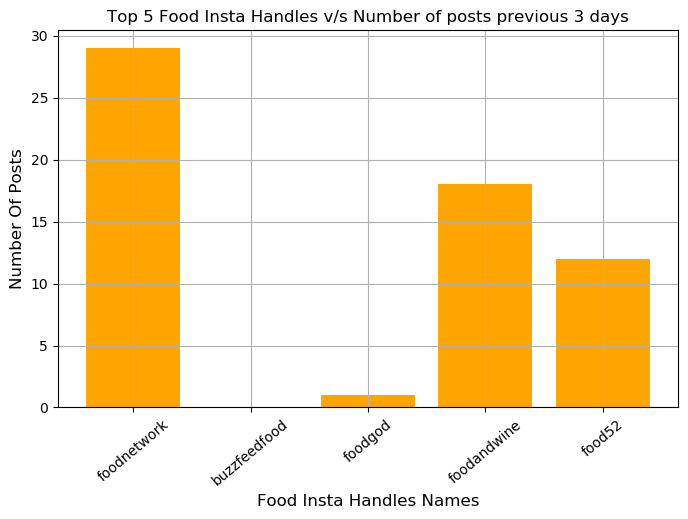

In [22]:
# using matplotlib to create graph.

posts_number = Post_count(top_handles) # calling function to get dictionary
page_name = posts_number.keys() # extracting name of handles
count = posts_number.values() # number of posts in previous 3 days

# plotting graph

plt.figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='green')
plt.grid()
plt.bar(page_name, count, color = 'orange')
plt.title('Top 5 Food Insta Handles v/s Number of posts previous 3 days')
plt.xlabel('Food Insta Handles Names', size = 12)
plt.ylabel('Number Of Posts', size = 12)
plt.xticks(rotation = 40)
plt.show()

## 2) Your friend also needs a list of hashtags that he should use in his posts.

### 2.1) Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

### 2.2) Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [95]:
# QUESTION 2.1 - 2.2)

"""""
Firstly made a function to go to each post and extract it's content i.e all the words and the hashtags used in captions , 
This Function extracts both hashtags as well as words and then counts the frequency of each word or hashtag and 
returns both in dictionary form.

Used exceptions for each cases like for opening a post, loading the post and used the wait object so that element gets loaded completely, 
and if it isn't present then used exceptions for that.

In tags , first splitted all the content and then if the word starts with # then stripped it and extracted in the dictionary
to count the freq of the tag.

For words , we split about all the words that do not start with a-z or A-Z and then store these words in a dictionary to calc
their count.

This has been done for 10 posts of each handle.

"""""

def words_and_hashtags(driver,words,hashtags) :
    wait = WebDriverWait(driver, 10)
    #Try opening the first post
    try :
        li = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'v1Nh3')))
        li.click()
    except Exception as e:
        print("Cant Open Post") 
        return
    
    #Loop will run 10 times, since we are to scrape first 10 posts
    for i in range(10) :
       
        #checkif the post is loaded by locating some element such as time of upload
        try : 
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_1o9PC')))
        except Exception as e:
            print("Loading error")
            return
        
        #Get the element(post) which represent caption using xpath
        try:
            post = wait.until(EC.presence_of_element_located((By.XPATH,'//article/div[2]/div[1]/ul/div/li/div/div/div[2]/span'))).text

            # post is into hashtags, l contains all the hashtags of the post
            l = [tag.strip("#") for tag in post.split() if tag.startswith("#")]

            # add hashtags in the dictionary
            for i in l :
                for j in i.split('#') : # this is done to handle cases such as #abc#def#xyz 
                    hashtags[j] = hashtags.get(j,0) + 1

            # post again split about all non alphabets, this time to contain all the words
            for i in re.split('[^a-zA-Z]',post):
                if i != '' :
                    words[i] = words.get(i,0) + 1 
        except Exception as e:
            print('No Caption in post Number', i )
       
        #press the next button, if not located means no more posts. (In case of total posts less than 10)
        try : 
            nxt = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
            nxt.click()
        except Exception as e:
            print("No more posts")
            break     

    #return both dictionaries
    return words,hashtags

In [96]:
# this function calls the above function to get content of all the pages ,
# this will return 2 dictionaries for tags and words.
# here we get all the words and tags in the 10 posts of top 5 pages.

def content(insta_handles) :
    words = {} 
    hashtags = {}
    for j in insta_handles : # iterating through each handle.
        driver.get('https://www.instagram.com/' + str(j[0])) 
        time.sleep(3)
        
        # updating the dictionaries
        words, hashtags = words_and_hashtags(driver,words,hashtags)
        
    return words, hashtags

In [97]:
# calling finction to get content of 10 posts of top 5 pages

words, hashtags = content(top_handles)

print(words)
print(hashtags)

No Caption in post Number 8
{'Instant': 1, 'Pot': 1, 'Lava': 1, 'Cakes': 2, 'Got': 1, 'a': 62, 'craving': 1, 'for': 39, 'something': 5, 'decadent': 2, 'gooey': 1, 'and': 64, 'chocolatey': 1, 'We': 6, 've': 1, 'got': 1, 'you': 19, 'covered': 1, 'in': 50, 'no': 2, 'time': 3, 'WeCook': 5, 'Rice': 1, 'doesn': 1, 't': 11, 'have': 9, 'to': 71, 'be': 13, 'boring': 1, 'Add': 1, 'some': 2, 'pizazz': 1, 'with': 25, 'gourmet': 1, 'gab': 1, 's': 46, 'tangy': 1, 'chimichurri': 1, 'sauce': 1, 'Top': 1, 'spicy': 1, 'chorizo': 1, 'creamy': 4, 'avo': 1, 'or': 9, 'whatever': 1, 'proteins': 1, 'veg': 1, 'around': 6, 'the': 94, 'house': 2, 'Take': 2, 'Gab': 1, 'class': 11, 'today': 2, 'on': 20, 'FoodNetworkKitchen': 5, 'app': 7, 'Apple': 2, 'Cinnamon': 2, 'Bun': 2, 'Pie': 2, 'Mash': 1, 'Up': 2, 'Watch': 3, 'what': 9, 'happens': 1, 'when': 6, 'cinnamon': 1, 'buns': 1, 'apple': 1, 'pie': 2, 'collide': 1, 'There': 3, 'NO': 1, 'better': 5, 'way': 2, 'celebrate': 1, 'NationalApplePieDay': 1, 'Save': 4, 'recipe

### 2.3) Create a csv file with two columns : the word and its frequency

In [98]:
# creating a dataframe for words by taking keys which give names of words and values as frequency 

df = pd.DataFrame(list(zip(words.keys(), words.values())), columns = ['WORD', 'FREQUENCY'])
df

,WORD,FREQUENCY
0,Instant,1
1,Pot,1
2,Lava,1
3,Cakes,2
4,Got,1
...,...,...
1035,even,1
1036,scoop,1
1037,vanilla,1
1038,ice,1


In [99]:
# QUES 2.3) 
# created a csv file using to_csv 

df.to_csv('words_and_frequency.csv', index = False )

### 2.4) Now, find the hashtags that were most popular among these bloggers

In [100]:
# finding most popular hashtags by sorting the dicitonary containg hashtags and their freq according to their frequency.

sorted_hashtags = sorted(hashtags.items(), key = lambda kv:kv[1], reverse = True)
sorted_hashtags

[('f52community', 8),
 ('FWBNC.', 6),
 ('WeCook', 5),
 ('TheKitchen', 2),
 ('FWBNC', 2),
 ('f52grams', 2),
 ('NationalApplePieDay', 1),
 ('BarefootContessa', 1),
 ('SupermarketStakeout', 1),
 ('bringme', 1),
 ('portlandtravel', 1),
 ('sushirestuarant', 1),
 ('sushi', 1),
 ('oregontravel', 1),
 ('sustainability', 1),
 ('ALLINCHALLENGE', 1),
 ('foodgod', 1),
 ('geniusrecipes—an', 1),
 ('geniusdesserts', 1),
 ('biglittlerecipes', 1)]

In [102]:
# Top 5 hashtags by taking only first 5 among the above list

print('Top 5 most popular hashtags are :-')
print()
for i in range(5) :
    print(sorted_hashtags[i][0])

Top 5 most popular hashtags are :-

f52community
FWBNC.
WeCook
TheKitchen
FWBNC


### 2.5) Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

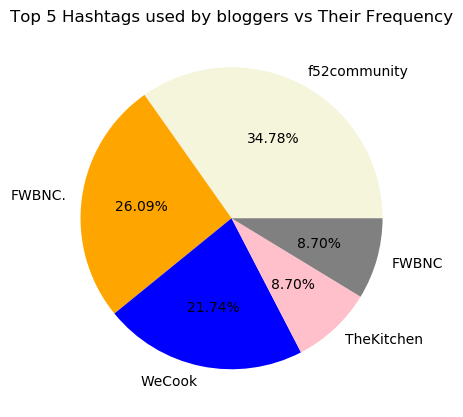

In [141]:
# plotting the top 5 hashtags and their frequency 

top_5_hashtags = sorted(hashtags.items(), key = lambda kv:kv[1], reverse = True)[:5] # sorting acc to freq and taking only top 5

hashtag = []
freq = []

# creating 2 lists one for names of handles and other one for freq i.e number of times they were used by bloggers
for i in top_5_hashtags :
    hashtag.append(i[0])
    freq.append(i[1])

# plotting pie chart
plt.figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='green')
color = ["beige", "orange", "blue", "pink", "grey"] # giving colors of choice
plt.pie(freq, labels = hashtag, colors = color, autopct = '%.2f%%')
plt.title('Top 5 Hashtags used by bloggers vs Their Frequency')
plt.show()

## 3) You need to also calculate average followers : likes ratio for the obtained handles.
## Followers : Likes ratio is calculated as follows:

### 3.1) Find out the likes of the top 10 posts of the 5 handles obtained earlier.

### 3.2) Calculate the average likes for a handle.

### 3.3) Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [149]:
# QUESTION 3.1 - 3.3

"""""
Firstly made a function to go to handle and extract number of followers , then go to each post and 
extract it's likes. 

Now, there are two cases, 

For Images , it is directly written so, found the class and extracted it.

For Videos , first we have to click on views then , we can access the likes on the post 

so, first we check if the element for likes is present directly or not , if not then we access y clicking on views button

All the possible exceptions are handled.

This has been done for 10 posts of each handle.

"""""
def follower_like_ratio(driver):
    wait = WebDriverWait(driver, 5)

    #Try locating the followers button to get the total number of followers
    try : 
        followers_ele = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'g47SY')))[1]
        followers = int(followers_ele.get_attribute('title').replace(',' , ''))  
    except Exception as e:     
        print('Cant access followers')
    
    #Open the first post
    try :
        li = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'v1Nh3')))
        li.click()
    except Exception as e:
        print("Cant Open Post") 
        return
    
    #Create a list to keep an account of like of each post
    lst = []
    
    for i in range(10) :
        try : 
            
            #Get the element which shows the number of likes
            temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'Nm9Fw')))
            if temp.text == '' :
                temp = driver.find_elements_by_class_name('Nm9Fw')[-1]
       
            #In case of videos, likes are not visible.
            #Hence we first need to click on views then scrape the number of likes
            #Then click on outside again so that you can click on next button 
        
        except Exception as e:     
            try : 
                # Locating the views 
                driver.find_element_by_class_name('vcOH2').click()
                #getting likes
                temp = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vJRqr')))  
            except Exception as e:
                print("Loading error")
                return
      
        #Calculating likes and appending to the list
        likes = int(temp.text.split()[0].replace(',',''))
        lst.append(likes)
       
        
        #click on next button, in case of videos, next button will not be visible immidiately, first we need to click outside
        try : 
            driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
        
        except Exception as e:
            try : 
                #clcik on outside
                driver.find_element_by_class_name('QhbhU').click() 
                #try to click on next button again
                nxt = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'coreSpriteRightPaginationArrow')))
                nxt.click()
            except Exception as e:
                print("No more posts")
                break     
    
    #calculate likes : followers ratio
    avg_likes = sum(lst)/len(lst)
    #print(avg_likes)  # please un-comment this comment to print the average likes
    ratio = followers/avg_likes
    return ratio 

In [151]:
# printing average likes of each page 
# please un-comment the comment for printing the average likes of a handle.

for j in top_handles : # visiting each handle
        driver.get('https://www.instagram.com/' + str(j[0]))
        time.sleep(3)
        print(j[0], 'avg likes-')
        follower_like_ratio(driver) # storing ratio of each handle along with it's name
        

foodnetwork avg likes-
16168.6
buzzfeedfood avg likes-
5490.4
foodgod avg likes-
23938.3
foodandwine avg likes-
2535.7
food52 avg likes-
12114.1


In [138]:
# caling the above function for all the 5 handles extracted previously

def all_pages_ratio(insta_handles) :
    handle_ratio = {} # making dict for name and its ratio
    for j in insta_handles : # visiting each handle
        driver.get('https://www.instagram.com/' + str(j[0]))
        time.sleep(3)
        handle_ratio[str(j[0])] = follower_like_ratio(driver) # storing ratio of each handle along with it's name
        
    return handle_ratio

In [139]:
# calling the above function to get ratios for all the handles

handle_ratio = all_pages_ratio(top_handles)
handle_ratio

{'foodnetwork': 647.0178211859462,
 'buzzfeedfood': 682.9690004371266,
 'foodgod': 150.29155822182489,
 'foodandwine': 1349.6529318541998,
 'food52': 226.09620652444593}

### 3.4) Create a bar graph to depict the above obtained information.

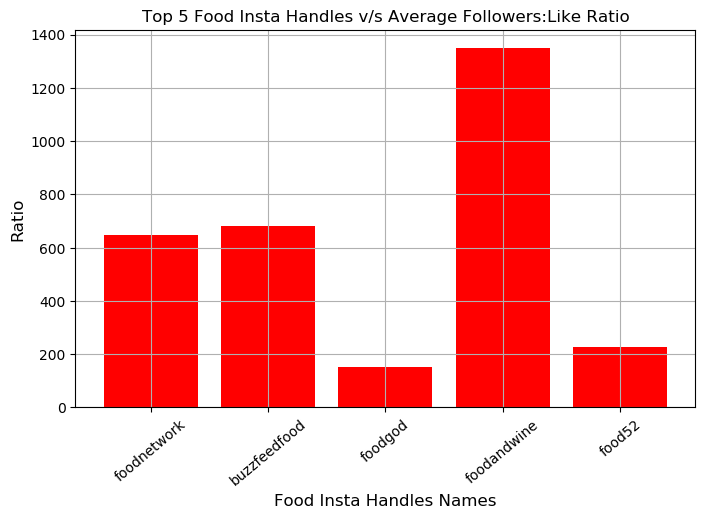

In [143]:
# plotting bar graph using matplotlib

handle_name = handle_ratio.keys() # names of the handles
handle_like_ratio = handle_ratio.values() # their Follower : like ratio

plt.figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='green') # for size of graph
plt.grid()
plt.bar(handle_name, handle_like_ratio, color = 'red')
plt.title('Top 5 Food Insta Handles v/s Average Followers:Like Ratio')
plt.xlabel('Food Insta Handles Names', size = 12)
plt.ylabel('Ratio', size = 12)
plt.xticks(rotation = 40) # rotating names on x-axis by 40 degrees
plt.show()

In [152]:
# destroying the driver session.

driver.quit()